In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

In [3]:
import os
import sys

In [4]:
# chaging directory

In [5]:
root, *_ = !pwd

In [6]:
if root.endswith('notebooks'):
    os.chdir('../')
    root, *_ = !pwd
    sys.path.append('src/')

In [7]:
os.getcwd()

'/home/med/projects/competitions/mlb-kaggle'

In [8]:
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
RAW_PATH = Path(os.environ['RAW_PATH'])

In [10]:
PROCESSED_PATH = Path(os.environ['ROOT_DIR']) / 'processed'

In [11]:
os.listdir(RAW_PATH)

['seasons.csv',
 'teams.csv',
 'example_sample_submission.csv',
 'train.csv',
 'mlb-player-digital-engagement-forecasting.zip',
 'awards.csv',
 'players.csv',
 'example_test.csv',
 'mlb']

In [12]:
os.listdir(PROCESSED_PATH)

['target.csv', 'raw_data.csv']

In [13]:
df = pd.read_csv(PROCESSED_PATH / 'raw_data.csv',
                 parse_dates=['date', 'mlbDebutDate', 'DOB'])

/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df

,playerId,target1,target2,target3,target4,date,target_avg,battingOrder,gamesPlayedBatting,flyOuts,...,inSeason,seasonPart,DOB,mlbDebutDate,birthCountry,weight,primaryPositionName,player_in_test,height,playerBMI
0,112526,0.055277,5.496109,0.025839,16.176471,2018-01-01,5.438424,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
1,112526,0.060625,3.252914,0.030486,8.541353,2018-01-02,2.971345,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
2,112526,0.029341,1.648352,0.032613,10.490112,2018-01-03,3.050104,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
3,112526,0.014799,2.665894,0.087422,19.091467,2018-01-04,5.464896,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
4,112526,0.083916,1.161002,0.024759,6.643880,2018-01-05,1.978389,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506171,685503,0.044617,1.224728,0.009437,0.737463,2021-04-26,0.504062,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106
2506172,685503,0.019123,1.178880,0.013161,0.790301,2021-04-27,0.500366,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106
2506173,685503,0.015799,4.323489,0.002350,0.970273,2021-04-28,1.327977,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106
2506174,685503,0.018770,31.946021,0.305491,5.938273,2021-04-29,9.552139,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106


### players data

In [15]:
# not all players are in the private test set
# the players in the test set are saved in the players.csv file

In [16]:
_players = pd.read_csv(RAW_PATH / 'players.csv')

In [17]:
_players['playerForTestSetAndFuturePreds'].fillna(False, inplace=True)

In [18]:
player_in_test = _players.query('playerForTestSetAndFuturePreds')['playerId']

In [19]:
# player_in_test holds only the players in the test set

### filter players

In [20]:
from data.util import filter_by_date, filter_by_id

In [21]:
# filter only test players
df = filter_by_id(df, player_in_test)

In [22]:
# if you want to run on a sample,
# change sample_size to the number of players in the sample
sample_size = 1

In [23]:
if sample_size is not None and sample_size > 0:
    playerList = df.groupby(['playerId'])['target_avg'].std().sort_values(ascending=False).reset_index()
    df = filter_by_id(df, playerList['playerId'].head(sample_size))

In [24]:
df.playerId.nunique()

1

In [25]:
# player stats

In [26]:
df.head()

,playerId,target1,target2,target3,target4,date,target_avg,battingOrder,gamesPlayedBatting,flyOuts,...,inSeason,seasonPart,DOB,mlbDebutDate,birthCountry,weight,primaryPositionName,player_in_test,height,playerBMI
0,547180,1.053613,18.385214,1.519313,29.215686,2018-01-01,12.543456,NaN,NaN,NaN,...,False,Offseason,1992-10-16,2012-04-28,USA,95.25432,Outfielder,True,1.905,26.24791
1,547180,0.754390,8.809976,1.252410,22.406015,2018-01-02,8.305698,NaN,NaN,NaN,...,False,Offseason,1992-10-16,2012-04-28,USA,95.25432,Outfielder,True,1.905,26.24791
2,547180,0.638826,8.104396,0.943071,34.522786,2018-01-03,11.052270,NaN,NaN,NaN,...,False,Offseason,1992-10-16,2012-04-28,USA,95.25432,Outfielder,True,1.905,26.24791
3,547180,0.068950,14.372646,2.117255,43.216697,2018-01-04,14.943887,NaN,NaN,NaN,...,False,Offseason,1992-10-16,2012-04-28,USA,95.25432,Outfielder,True,1.905,26.24791
4,547180,0.282573,5.105609,1.141172,15.317240,2018-01-05,5.461649,NaN,NaN,NaN,...,False,Offseason,1992-10-16,2012-04-28,USA,95.25432,Outfielder,True,1.905,26.24791


In [27]:
df.columns

Index(['playerId', 'target1', 'target2', 'target3', 'target4', 'date',
       'target_avg', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPi

### preprocessing with pipelines

In [28]:
from typing import List
def forward_fill(df: pd.DataFrame, features: List[str],
                 on='playerId',
                 limit: int =None):
    ffilled_df = df.groupby(on)[features].ffill(limit=limit)
    df.loc[:, features] = ffilled_df
    return df

In [29]:
def gen_hardcoded_features(df: pd.DataFrame):
    # some feature eng for the dates
    df['playerAge'] = (df['date'] - df['DOB']).dt.total_seconds()
    df['playerTSinceDebut'] = (df['date'] - df['mlbDebutDate']).dt.total_seconds()
    df['playerDebutAge'] = (df['mlbDebutDate'] - df['DOB']).dt.total_seconds()
    df['rostersTime'] = (df['date'] - pd.to_datetime(df['rosterDate'])).dt.total_seconds()
    df['rostersTime'] /= 60 * 60 * 24
    # normalize
    df[['playerAge', 'playerTSinceDebut', 'playerDebutAge']] /= 60 * 60 * 24 * 365
    df['AwardWinner'] = df['awardId'].isna().astype(np.float32)
    return df

In [30]:
def fillna(df: pd.DataFrame, fill_value=-1):
    return df.fillna(-1)

In [31]:
from pipeline.core import FunctionTransformer, Pipeline, PdColumnTransformer, PdFeatureUnion
from pipeline.continuous import PdScaleNorm, FilterContinuousFeatures, MedianFillNaN
from pipeline.stats import StatisticGen, LagGen, FeaturesTable
from pipeline.categories import Categorify
from pipeline.season import join_season_info
from pipeline.players import join_players_info

In [32]:
# transformer for filling nan values with past valid values
# transformer for generating some hardcoded features
fill_forward_tmf = FunctionTransformer(forward_fill, kw_args={'features':['numberOfFollowers',
                                                                        'teamFollowers',
                                                                        'status',
                                                                        'teamId', 'rosterDate']})
join_players_tmf = FunctionTransformer(join_players_info, kw_args={'path_to_players': RAW_PATH / 'players.csv'})
harcoded_feat_tmf = FunctionTransformer(gen_hardcoded_features)

In [33]:
# creating pipeline
ffill_and_gen_harcoded_feat = Pipeline([('fill_forward', fill_forward_tmf),
                                       ('hardcoded_feat', harcoded_feat_tmf)])

In [34]:
# features to use for target preprocessing
target_cols = ['target1', 'target2', 'target3', 'target4']
index_cols = ['date', 'playerId']
pp_cols = target_cols + index_cols

In [35]:
# categories encoding
categories = ['playerId', 'seasonPart', 'year', 'primaryPositionName',
              'status', 'teamId', 'awardId']

categories_tmf = PdColumnTransformer([(category, Categorify(add_nan=True), category)
                                       for category in categories])

In [42]:
# for the statistics, we will compute them and then resuse them
stats_gen_tmf = StatisticGen(stats=['mean', 'median', 'std'], windows=[90], drop_index=False)
target_stats_tmf = PdColumnTransformer([('gen_stats', stats_gen_tmf, pp_cols)])
target_stats_table = target_stats_tmf.fit_transform(df)

In [43]:
target_stats_table.head()

,playerId,date,target1__mean__90d,target1__median__90d,target1__std__90d,target2__mean__90d,target2__median__90d,target2__std__90d,target3__mean__90d,target3__median__90d,target3__std__90d,target4__mean__90d,target4__median__90d,target4__std__90d
0,547180,2018-01-01,1.053613,1.053613,NaN,18.385214,18.385214,NaN,1.519313,1.519313,NaN,29.215687,29.215687,NaN
1,547180,2018-01-02,0.904002,0.904002,0.211582,13.597595,13.597595,6.770716,1.385861,1.385861,0.188729,25.810850,25.810850,4.815165
2,547180,2018-01-03,0.815610,0.754390,0.214063,11.766528,8.809976,5.742796,1.238265,1.252410,0.288381,28.714828,29.215687,6.073893
3,547180,2018-01-04,0.628945,0.696608,0.412218,12.418057,11.591311,4.866666,1.458012,1.385861,0.498596,32.340298,31.869236,8.784693
4,547180,2018-01-05,0.559670,0.638826,0.389150,10.955568,8.809976,5.334577,1.394644,1.252410,0.454452,28.935684,29.215687,10.762668


In [ ]:
def positional_embedding(position: np.ndarray, dimension: int = 40):
    freq =  1 / (10000 ** (np.arange(0., dimension, 2.) / dimension))
    position = np.outer(position, freq)
    position = np.concatenate((np.sin(position), np.cos(position)), axis=-1)
    return position


from sklearn.base import BaseEstimator, TransformerMixin
from typing import List
import pandas as pd
import numpy as np


class FeaturesTable(BaseEstimator, TransformerMixin):
    def __init__(self, table: pd.DataFrame,
                 lags: List[int] = [0],
                 on: List[str] = ['playerId', 'date'],
                 date_col: str = 'date',
                 clip_max: bool = True):
        self.on = on
        self.lags = lags
        self.table = table
        self.date_col = date_col
        self.clip_max = clip_max
        self.max_date = table[self.date_col].max().to_numpy()

    
    def fit(self, X: pd.DataFrame, y=None):
        return self

    def _merge_table(self, X: pd.DataFrame,
                     lag: int) -> pd.DataFrame:
        Xon = X.loc[:, self.on].copy()
        Xon[self.date_col] = X[self.date_col] - pd.to_timedelta(lag, unit='d')
        if self.clip_max:
            Xon[self.date_col] = np.minimum(Xon[self.date_col], self.max_date)
        outputX = Xon.merge(self.table, on=self.on,
                            how='left').drop(self.on, axis=1)
        assert len(outputX) == len(X), \
               f'the len {len(X)} of the input do not match the output len {len(outputX)}'
        outputX.columns += f'__{lag}lag'
        return outputX

    def transform(self, X: pd.DataFrame):
        return pd.concat([self._merge_table(X, lag)
                          for lag in self.lags], axis=1)

In [109]:
## merge computed statistics
reuse_computed_stats = Pipeline([('merge_stats', FeaturesTable(target_stats_table, lags=[60], clip_max=True)),
                                 ('fillnan', FunctionTransformer(fillna)),
                                 ('normalize', PdScaleNorm())])

In [38]:
# for continuous features, we will filter them and then fill nan values and normalize them

median_fillnan_columns = ['numberOfFollowers', 'teamFollowers',
                          'playerDebutAge', 'playerAge', 'playerTSinceDebut']
fillnan_median_tmf = MedianFillNaN(median_fillnan_columns)

# get the rest of the continuous features
continuous_feat_tmf = Pipeline([('get_cont_feat', FilterContinuousFeatures()),
                                ('fillnan_median', fillnan_median_tmf),
                                ('fillnan', FunctionTransformer(fillna)),
                                ('normalize', PdScaleNorm())
                               ])

In [112]:
# get the rest of the continuous features
continuous_feat_tmf = PdFeatureUnion([(f'reduction_{target_name}', ImportanceReduction(player_stats_features, target_name))
                                       for target_name in target_cols])

In [39]:
# putting all features generation steps together
all_features_tmf = PdFeatureUnion([('stats', target_stats_tmf), 
                                   ('cont_feat', continuous_feat_tmf),
                                   ('cats', categories_tmf)])

In [40]:
# main pipeline with all steps 
pipeline = Pipeline([('core_features', ffill_and_gen_harcoded_feat),
                     ('features_generation', all_features_tmf)])

In [41]:
pipeline

Pipeline(steps=[('core_features',
                 Pipeline(steps=[('fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f97c0ea25e0>,
                                                      kw_args={'features': ['numberOfFollowers',
                                                                            'teamFollowers',
                                                                            'status',
                                                                            'teamId',
                                                                            'rosterDate']})),
                                 ('hardcoded_feat',
                                  FunctionTransformer(func=<function gen_hardcoded_features at 0x7f97c0ea2940>))])),
                ('features_generation',
                 PdFeature...
                                                   PdColumnTransformer(transformers=[('playerId',
                     

In [116]:
from data.split import SplitData

In [117]:
# split the data on 2021-03-01 with a valid ds of 61 days
sp = SplitData("2021-03-01", test_days=61)

In [118]:
train_idx = sp.train_idx(df)
valid_idx = sp.valid_idx(df)

In [119]:
%%time
# train the pipeline only with the train dataset
pipeline.fit(sp.filter(df, train_idx))

CPU times: user 178 ms, sys: 314 µs, total: 179 ms
Wall time: 177 ms


Pipeline(steps=[('core_features',
                 Pipeline(steps=[('fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f8c5a4fb430>,
                                                      kw_args={'features': ['numberOfFollowers',
                                                                            'teamFollowers',
                                                                            'status',
                                                                            'teamId',
                                                                            'rosterDate']})),
                                 ('hardcoded_feat',
                                  FunctionTransformer(func=<function gen_hardcoded_features at 0x7f8c9025ff70>))])),
                ('features_generation',
                 PdFeature...
                                                   PdColumnTransformer(transformers=[('playerId',
                     

In [120]:
%%time
# transform all dataset
features = pipeline.transform(df)

CPU times: user 59 ms, sys: 336 µs, total: 59.3 ms
Wall time: 55.4 ms


In [121]:
pd.options.display.max_rows = 100
features.T.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215
target1__mean__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114530,0.113400,0.111972,0.109589,0.104514,0.098385,0.098468,0.113874,0.113430,0.111218
target1__median__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.080202,0.079523,0.078779,0.078779,0.078779,0.078779,0.078779,0.078779,0.078779,0.078779
target1__std__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.182190,0.182363,0.182436,0.181645,0.175763,0.165725,0.165791,0.237276,0.237128,0.236741
target2__mean__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.152724,0.155481,0.158992,0.165575,0.165316,0.163551,0.160171,0.159771,0.161318,0.162872
target2__median__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.121421,0.132069,0.132954,0.132954,0.132954,0.132954,0.132954,0.132954,0.133331,0.133639
target2__std__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.321483,0.322635,0.326561,0.352613,0.350939,0.346128,0.333460,0.333436,0.333027,0.332489
target3__mean__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029651,0.029713,0.042127,0.047967,0.048868,0.051796,0.052125,0.052239,0.051888,0.051811
target3__median__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012203,0.012203,0.012203,0.012203,0.012203,0.012203,0.012203,0.012203,0.012203,0.012203
target3__std__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124612,0.124610,0.250428,0.269130,0.269235,0.273014,0.272939,0.272941,0.273014,0.273044
target4__mean__90d__60lag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.155699,0.156037,0.156255,0.156284,0.156197,0.157308,0.158316,0.159023,0.159435,0.160707


In [122]:

# change the dtypes of the target (pytorch likes float32 and not float64)
df[target_cols] = df[target_cols].astype(np.float32)

In [123]:
train_idx.shape

(1216,)

In [124]:
train_idx.shape

(1216,)

In [125]:
train_data = sp.filter(features, train_idx)

raw_train_df = sp.filter(df, train_idx)

In [126]:
valid_data = sp.filter(features, valid_idx)
raw_valid_df = sp.filter(df, valid_idx)

In [127]:
train_data.shape, raw_train_df.shape

((1155, 23), (1155, 102))

In [128]:
valid_data.shape, raw_valid_df.shape

((61, 23), (61, 102))

In [129]:
# add the target to features ds
train_data[target_cols + ['date']] = raw_train_df[target_cols + ['date']]
valid_data[target_cols + ['date']] = raw_valid_df[target_cols + ['date']]

### modeling 

In [130]:
# # filter continuous features
continuous_feat = features.columns.drop(categories)

In [131]:
features_list = list(continuous_feat) + categories

In [132]:
features_list

['target1__mean__90d__60lag',
 'target1__median__90d__60lag',
 'target1__std__90d__60lag',
 'target2__mean__90d__60lag',
 'target2__median__90d__60lag',
 'target2__std__90d__60lag',
 'target3__mean__90d__60lag',
 'target3__median__90d__60lag',
 'target3__std__90d__60lag',
 'target4__mean__90d__60lag',
 'target4__median__90d__60lag',
 'target4__std__90d__60lag',
 'target1__reduction',
 'target2__reduction',
 'target3__reduction',
 'target4__reduction',
 'playerId',
 'seasonPart',
 'year',
 'primaryPositionName',
 'status',
 'teamId',
 'awardId']

In [133]:
from omegaconf import OmegaConf

parameters = {
 'objective':'mae',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1, 
 'n_estimators': 100000,
 'learning_rate': 0.1,
 'random_state': 42,
}
config = {'hp': parameters,
          'features': features_list,
          'categories': categories,
          'target_cols': target_cols}
config = OmegaConf.create(config)

In [134]:
config

{'hp': {'objective': 'mae', 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'n_estimators': 100000, 'learning_rate': 0.1, 'random_state': 42}, 'features': ['target1__mean__90d__60lag', 'target1__median__90d__60lag', 'target1__std__90d__60lag', 'target2__mean__90d__60lag', 'target2__median__90d__60lag', 'target2__std__90d__60lag', 'target3__mean__90d__60lag', 'target3__median__90d__60lag', 'target3__std__90d__60lag', 'target4__mean__90d__60lag', 'target4__median__90d__60lag', 'target4__std__90d__60lag', 'target1__reduction', 'target2__reduction', 'target3__reduction', 'target4__reduction', 'playerId', 'seasonPart', 'year', 'primaryPositionName', 'status', 'teamId', 'awardId'], 'categories': ['playerId', 'seasonPart', 'year', 'primaryPositionName', 'status', 'teamId', 'awardId'], 'target_cols': ['target1', 'target2', 'target3', 'target4']}

In [135]:
from train.lgbm import run_lgbm

In [136]:
# models are train with a run_fn, the run_fn return and ModelOutput (src/train/core.py)
# ModelOutput holds the trained models, a predict_fn to predict new data and
# the predictions of the validation set 

In [137]:
lgbm_output = run_lgbm(config, train_data, valid_data)

target1
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 13.2962


/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['awardId', 'playerId', 'primaryPositionName', 'seasonPart', 'status', 'teamId', 'year']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Early stopping, best iteration is:
[51]	valid_0's l1: 13.2725
target2
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 10.0946
Early stopping, best iteration is:
[27]	valid_0's l1: 8.67095
target3
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 9.73792
[200]	valid_0's l1: 9.7493
Early stopping, best iteration is:
[160]	valid_0's l1: 9.68914
target4
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 18.1623
Early stopping, best iteration is:
[1]	valid_0's l1: 17.8326


In [138]:
from evaluate.metrics import compute_metrics

In [139]:
valid_test_prediction = pd.DataFrame(lgbm_output.prediction, columns=['yhat1', 'yhat2', 'yhat3', 'yhat4'])

valid_test_prediction[pp_cols] = raw_valid_df[pp_cols]

In [140]:
is_test_pred = valid_test_prediction['date'] >= '2021-04-01'

valid_prediction, test_prediction = (valid_test_prediction.loc[~is_test_pred, :],
                                     valid_test_prediction.loc[is_test_pred, :])

In [141]:
# metrics from 2021-03-01 up to 2021-04-30
compute_metrics(valid_test_prediction)

{'mae_mean': 12.36629846530969,
 'mae_1': 13.272504361814983,
 'mae_2': 8.670947465149155,
 'mae_3': 9.68913580464886,
 'mae_4': 17.832606229625764}

In [142]:
# metrics from 2021-03-01 up to 2021-03-31
compute_metrics(valid_prediction)

{'mae_mean': 12.178387959156868,
 'mae_1': 12.992611103789525,
 'mae_2': 6.927093913805695,
 'mae_3': 6.219709085203616,
 'mae_4': 22.574137733828636}

In [143]:
# metrics from 2021-04-01 up to 2021-04-30
compute_metrics(test_prediction)

{'mae_mean': 12.560472655000941,
 'mae_1': 13.561727395107964,
 'mae_2': 10.472929468204063,
 'mae_3': 13.274210081408944,
 'mae_4': 12.933023675282795}

In [144]:
def plot_pred(df, playerId, index=1):
    pdf = df.query(f'playerId == {playerId}')
    
    f, ax = plt.subplots(1, 1, figsize=(20, 5))
    
    tname = f'target{index}'
    yhat_name = f'yhat{index}'
    
    ax.plot('date', tname, '-o', data=pdf, label=tname)
    ax.plot('date', yhat_name, '-o', data=pdf, label=tname)
    
    ax.legend()
    

In [145]:
def feature_importance(features, model):
    fi = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    fi.sort_values(by='importance', ascending=False, inplace=True)
    return fi

def compute_fi(features, models):
    fi = [feature_importance(features, _model).assign(target=f'target{target+1}')
      for target, _model in enumerate(models)]
    fi = pd.concat(fi)
    fi = fi.pivot('feature', 'target', 'importance')
    fi = fi * 100 / fi.sum()
    fi['mean'] = fi.mean(axis=1)
    fi.sort_values(by='mean', ascending=False, inplace=True)
    return fi

In [146]:
fi = compute_fi(features_list, lgbm_output.model)

In [147]:
features_list = fi.index[(fi['mean'] > 0)].to_list()

In [148]:
fi.head(100)

target,target1,target2,target3,target4,mean
feature,,,,,
target4__std__90d__60lag,7.124183,7.530864,6.666667,13.333333,8.663762
target1__std__90d__60lag,7.908497,5.555556,7.625000,13.333333,8.605596
target2__mean__90d__60lag,8.823529,9.876543,8.875000,6.666667,8.560435
target1__mean__90d__60lag,8.366013,4.197531,7.937500,13.333333,8.458594
target3__std__90d__60lag,7.320261,7.160494,7.312500,10.000000,7.948314
target2__std__90d__60lag,7.973856,7.654321,9.229167,6.666667,7.881003
target4__mean__90d__60lag,6.274510,10.617284,8.250000,3.333333,7.118782
target3__median__90d__60lag,6.601307,9.876543,4.250000,6.666667,6.848629
target1__median__90d__60lag,8.300654,7.160494,7.916667,3.333333,6.677787


In [149]:
worst_players = (valid_test_prediction.groupby('playerId')
                 .apply(lambda x: pd.Series(compute_metrics(x)))
                 .sort_values(by='mae_mean', ascending=False))

worst_players.head(10)

,mae_mean,mae_1,mae_2,mae_3,mae_4
playerId,,,,,
547180,12.366298,13.272504,8.670947,9.689136,17.832606


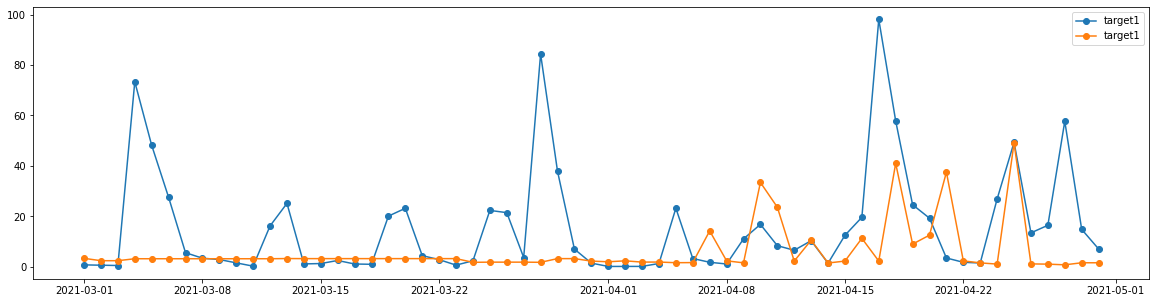

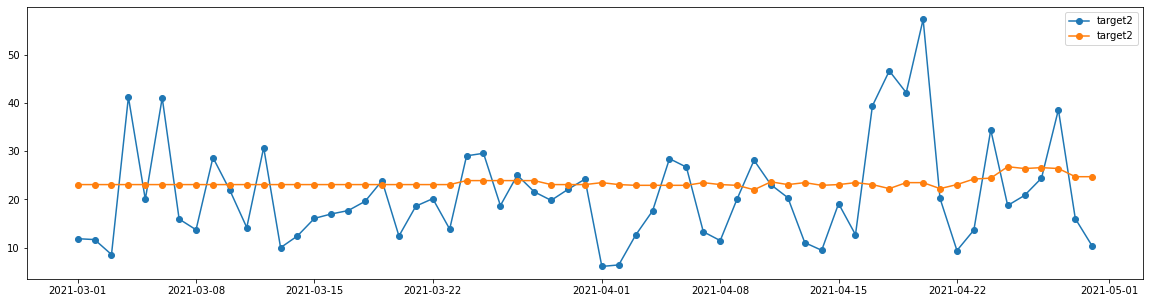

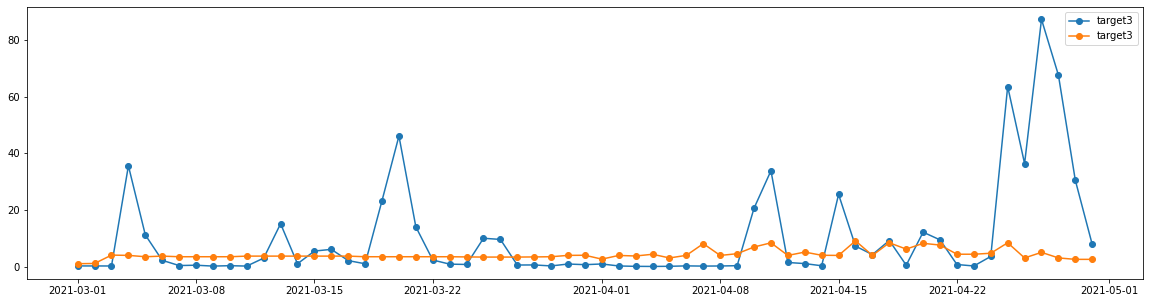

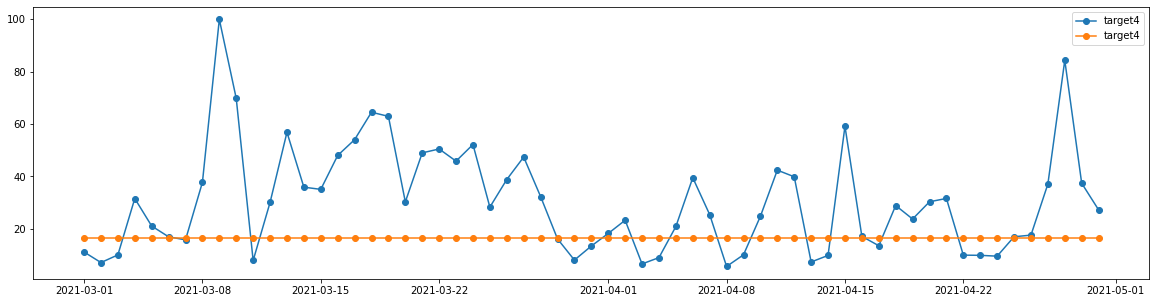

In [150]:
for index in range(1, 5):
    plot_pred(valid_test_prediction, playerId=547180, index=index)

In [151]:
player_stats_features = ['battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances']

In [80]:
from typing import List
class ImportanceReduction:
    def __init__(self, features: List[str],
                 target: str):
        self.features = features
        self.target = target
        
        self.output_name = f'{target}__reduction'
    
    def fit(self, X: pd.DataFrame):
        coef = X[self.features].corrwith(df[self.target]).abs()
        coef = coef / coef.sum()
        self.coef = coef
        return self
    
    def transform(self, X: pd.DataFrame):
        outputX = X.loc[:, self.features].fillna(-1) + 1
        reduction = (outputX * m.coef).sum(axis=1)
        
        return pd.DataFrame({self.output_name: reduction.to_numpy()})